# *Enron Corpus*

The Enron Corpus is a large and diverse dataset of emails exchanged by employees of the Enron Corporation, one of the largest energy companies in the United States, before its collapse in 2001. The dataset was made public after the company's bankruptcy, and it has since become a valuable resource for researchers in various fields, including natural language processing, machine learning, and social network analysis.

The Enron Corpus contains over 500,000 emails from more than 150 Enron employees, including senior executives, managers, and traders. The emails cover a wide range of topics, including business deals, personal correspondence, and even gossip. The dataset also includes metadata such as timestamps, sender and recipient information, and email folders, which can provide valuable insights into the structure and dynamics of the Enron organization.

Due to its size, diversity, and unique characteristics, the Enron Corpus has become a popular benchmark dataset for researchers in the field of computational linguistics. It has been used to develop and evaluate various text mining and information retrieval techniques, including sentiment analysis, topic modeling, and social network analysis. The Enron Corpus has also been used to study corporate communication, organizational culture, and ethical issues in business.

Overall, the Enron Corpus represents a fascinating and complex dataset that has the potential to provide valuable insights into the inner workings of a large corporation and the dynamics of organizational communication.


# *Data Pre-Processing*

Before conducting any data analysis, the Enron Corpus needs to be preprocessed to extract the email metadata and convert it into a network format. This involves extracting fields such as sender, recipient, date, and subject from the emails and creating a node list and an edge list that represent the sender-recipient relationships in the network.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re


In [2]:
data=pd.read_csv("./emails.csv")

In [3]:
data.describe

<bound method NDFrame.describe of                              file  \
0           allen-p/_sent_mail/1.   
1          allen-p/_sent_mail/10.   
2         allen-p/_sent_mail/100.   
3        allen-p/_sent_mail/1000.   
4        allen-p/_sent_mail/1001.   
...                           ...   
517396  zufferli-j/sent_items/95.   
517397  zufferli-j/sent_items/96.   
517398  zufferli-j/sent_items/97.   
517399  zufferli-j/sent_items/98.   
517400  zufferli-j/sent_items/99.   

                                                  message  
0       Message-ID: <18782981.1075855378110.JavaMail.e...  
1       Message-ID: <15464986.1075855378456.JavaMail.e...  
2       Message-ID: <24216240.1075855687451.JavaMail.e...  
3       Message-ID: <13505866.1075863688222.JavaMail.e...  
4       Message-ID: <30922949.1075863688243.JavaMail.e...  
...                                                   ...  
517396  Message-ID: <26807948.1075842029936.JavaMail.e...  
517397  Message-ID: <25835861.10758420299

Extract sender and recipient information from the "message" column

In [4]:
data['sender'] = data['message'].str.extract('From: (.+?)\n')
data['recipients'] = data['message'].str.extract('To: (.+?)\n')
data['date'] = data['message'].str.extract('Date: (.+?)\n')
data['subject'] = data['message'].str.extract('Subject: (.+?)\n')

Drop rows with missing sender or recipient information

In [5]:
data.dropna(subset=['sender', 'recipients'], inplace=True)

Print the first five rows of the resulting DataFrame

In [6]:
print(data.head())

                       file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message                   sender  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...  phillip.allen@enron.com   
1  Message-ID: <15464986.1075855378456.JavaMail.e...  phillip.allen@enron.com   
2  Message-ID: <24216240.1075855687451.JavaMail.e...  phillip.allen@enron.com   
3  Message-ID: <13505866.1075863688222.JavaMail.e...  phillip.allen@enron.com   
4  Message-ID: <30922949.1075863688243.JavaMail.e...  phillip.allen@enron.com   

                recipients                                   date    subject  
0     tim.belden@enron.com  Mon, 14 May 2001 16:39:00 -0700 (PDT)        NaN  
1  john.lavorato@enron.com   Fri, 4 May 2001 13:51:00 -0700 (PDT)        Re:  
2   leah.arsdall@enron.com  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)   Re: test  
3    randa

# *Network Construction*

The next step is to construct the network using the node list and edge list. This involves creating a graph or network object in a network analysis software such as Gephi or NetworkX.

Create a new directed graph

In [7]:

G = nx.DiGraph()

Add edges to the graph for each email

In [8]:
for _, row in data.iterrows():
    sender = row['sender']
    recipients = row['recipients'].split(',')
    for recipient in recipients:
        recipient = recipient.strip()
        G.add_edge(sender, recipient)

Print some basic information about the graph


In [9]:
print(nx.info(G))
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

DiGraph with 45593 nodes and 122837 edges
Number of nodes: 45593
Number of edges: 122837


C:\Users\Rutuj Daily\AppData\Local\Temp\ipykernel_34756\688518533.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


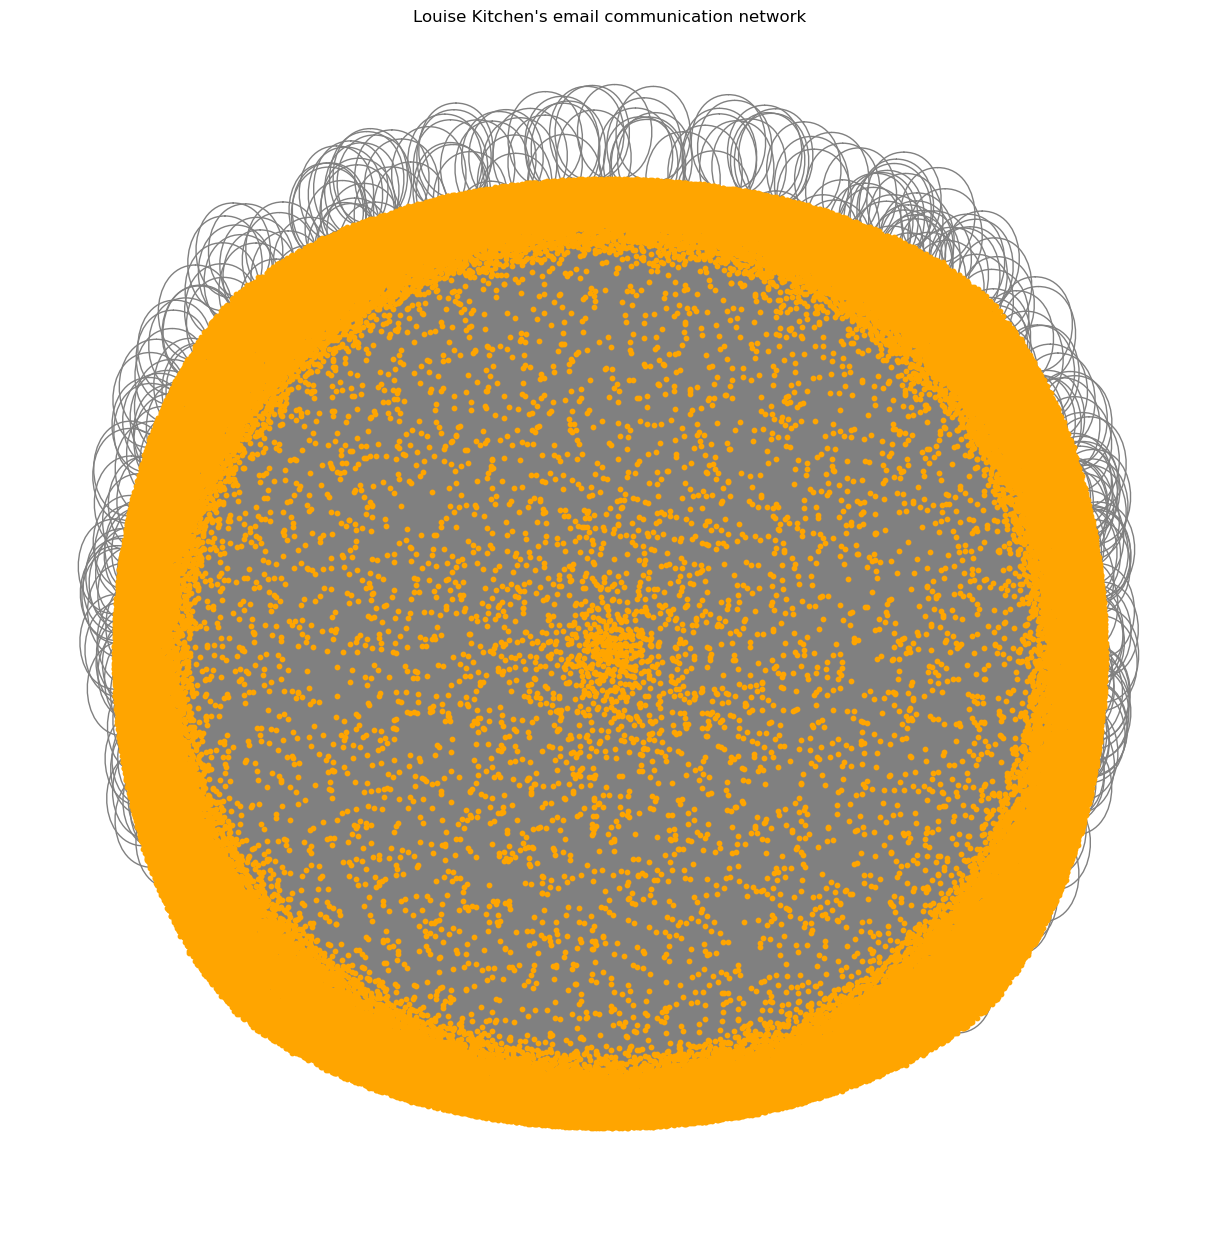

In [11]:
network = nx.from_pandas_edgelist(data, "sender", "recipients")
# Plot the communication network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(network, k=0.2)
nx.draw(network, pos, node_size=10, node_color="orange", edge_color="gray", with_labels=False, font_size=8)
plt.title(" Enron email communication network")
plt.show()

Plotting the network graph is a computationally intensive process and does not really yield any additional knowledge, For a bigger project this process is totally unnecessary and should be avoided altogether. 